# Assignment 1: Autoencoders

Gianluca Vico (i6183186) & Alexandra Gianzina (i6294354)


In [57]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
import time
import pickle

import dataset
import functions
import model 

importlib.reload(functions)
importlib.reload(model)

np.random.seed(0)

## What we are going to investigate

First, we train the model with batched gradient descent. We investigate different earning rates and regularization weights and compare the epochs that the model needs to converge.

Then, we have a look at the units in the hidden layer and the weights. Since there are only 8 training samples, we can do this for each sample.
We think that the 3 units in the hidden layer might correspond to some binary representation of the 8 inputs.

Later, we test the model on inputs that contains more than one 1 (e.g., \[1, 1, 0, 0, 0, 1, 0, 0\]).

In [91]:
lambdas = [0, 0.01, 1]
alphas = [0.01, 0.1, 0.9]

a_reduction = [0.05, 0.2]
a_steps = [1000, 10000]
data = dataset.Dataset()

## Experiment 1

Training different models with different combinations of $\alpha$ and $\lambda$.

We also check the output for every example instance to see if the model is generating wrong predictions.

In [60]:
models = {}
for l in lambdas:
    for a in alphas:    
        print(f"Train with alpha={a} and lambda={l}")
        m = model.Autoencoder()
        start = time.time()        
        #x, y, a, l, max_iter = 1000000, err = 0.01, a_reduction = 0, reduction_steps=100
        j, it = m.train(data.get_data(), data.get_data(), a, l, 500000)
        t_time = time.time() - start
        print(f"--Time: {t_time}s")
        print(f"--Error: {j[it]}")
        print(f"--Iterations: {it}")
        print()
        models[(a, l)] = (m, j, t_time)

Train with alpha=0.01 and lambda=0
--Time: 189.1677963733673s
--Error: 0.05674358286831947
--Iterations: 499999

Train with alpha=0.1 and lambda=0
--Time: 192.0857355594635s
--Error: 0.013525593684404594
--Iterations: 499999

Train with alpha=0.9 and lambda=0
Exit at iteration: 101112
--Time: 39.06259322166443s
--Error: 0.009999985884759168
--Iterations: 101112

Train with alpha=0.01 and lambda=0.01
--Time: 185.5102574825287s
--Error: 0.4438433343054653
--Iterations: 499999

Train with alpha=0.1 and lambda=0.01
--Time: 187.06268978118896s
--Error: 0.5370411041820541
--Iterations: 499999

Train with alpha=0.9 and lambda=0.01
--Time: 184.34144473075867s
--Error: 0.9285999423861694
--Iterations: 499999

Train with alpha=0.01 and lambda=1
--Time: 184.34819769859314s
--Error: 0.9354143466934853
--Iterations: 499999

Train with alpha=0.1 and lambda=1
--Time: 182.49108743667603s
--Error: 0.9354143466934853
--Iterations: 499999

Train with alpha=0.9 and lambda=1
--Time: 183.37981414794922s
--E

In [62]:
with open("models.pkl", "wb") as f:
    pickle.dump(models, f)

In [84]:
changing_models = {}
fixed_l = 0
for a in [0.9]:
    for ar in a_reduction:
        for as_ in a_steps:
            print(f"Train with alpha={a}, a_reduction={ar}, a_steps={as_}")
            m = model.Autoencoder()
            start = time.time()        
            j, it = m.train(data.get_data(), data.get_data(), a, fixed_l, 100000, a_reduction = ar, reduction_steps = as_)
            t_time = time.time() - start
            print(f"--Time: {t_time}s")
            print(f"--Error: {j[it]}")
            print(f"--Iterations: {it}")
            print()
            changing_models[(a, ar, as_)] = (m, j, t_time)

Train with alpha=0.9, a_reduction=0.05, a_steps=1000
--Time: 36.91964340209961s
--Error: 0.021630230803283027
--Iterations: 99999

Train with alpha=0.9, a_reduction=0.05, a_steps=10000
--Time: 37.19664478302002s
--Error: 0.011325715215408094
--Iterations: 99999

Train with alpha=0.9, a_reduction=0.2, a_steps=1000
--Time: 37.827603340148926s
--Error: 0.04715030287540663
--Iterations: 99999

Train with alpha=0.9, a_reduction=0.2, a_steps=10000
--Time: 37.35340857505798s
--Error: 0.014610652423678655
--Iterations: 99999



In [85]:
with open("changing_models.pkl", "wb") as f:
    pickle.dump(changing_models, f)

In [ ]:
#with open("models.pkl", "rb") as f:
#    models = pickle.load(f)
#with open("changing_models.pkl", "rb") as f:
#    changing_models = pickle.load(f)

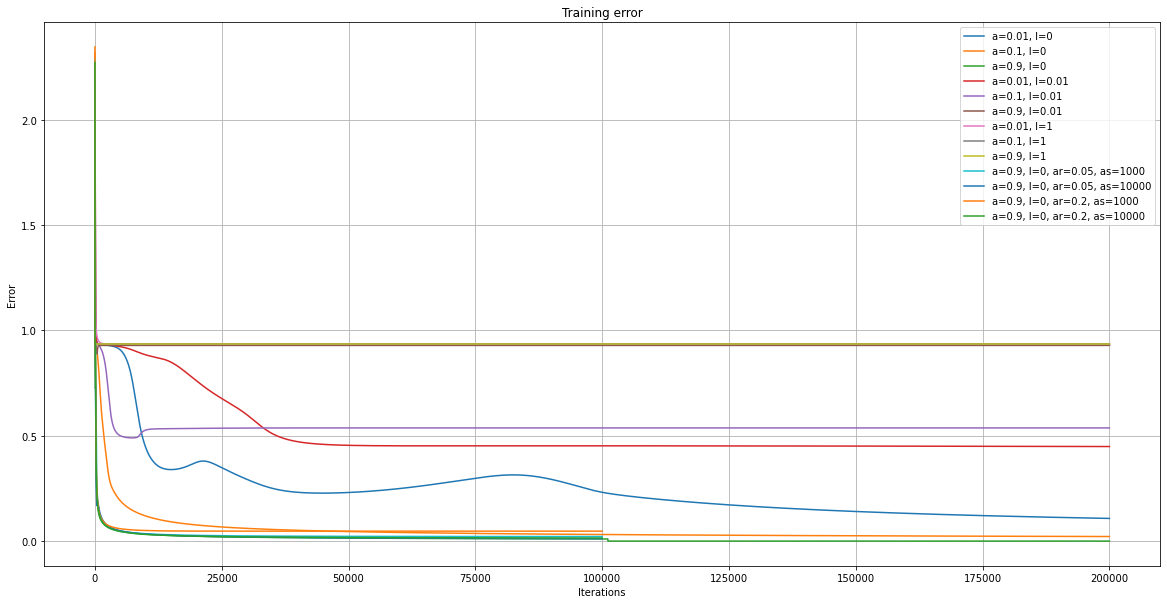

In [88]:
# graph iter - J
plt.figure(figsize=(20,10))
for k, v in models.items():
    _, j, _ = v
    a, l = k
    plt.plot((range(len(j[:200000]))), j[:200000], label=f"a={a}, l={l}")

for k, v in changing_models.items():
    _, j, _ = v
    a, ar, as_ = k
    plt.plot((range(len(j[:200000]))), j[:200000], label=f"a={a}, l={fixed_l}, ar={ar}, as={as_}")

    
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Training error")
plt.grid()

plt.legend()
plt.show()

The above graph shows the error at each iteration for all the training models we implemented.

In the legend, "a" refers to the learning rate $\alpha$, "l" is the regularization $\lambda$, "ar" refers to the reduction of the learning rate (when used) and "as" is the number of steps needed for $\alpha$ to be reduced. 

As we can see from the graph, most of the models are reducing the error during the training.

We can also observe that when using $\lambda=1$, the error stops improving after few iterations and it is higher than the other models.
When $\lambda=0$, then we have better performance than the other models.

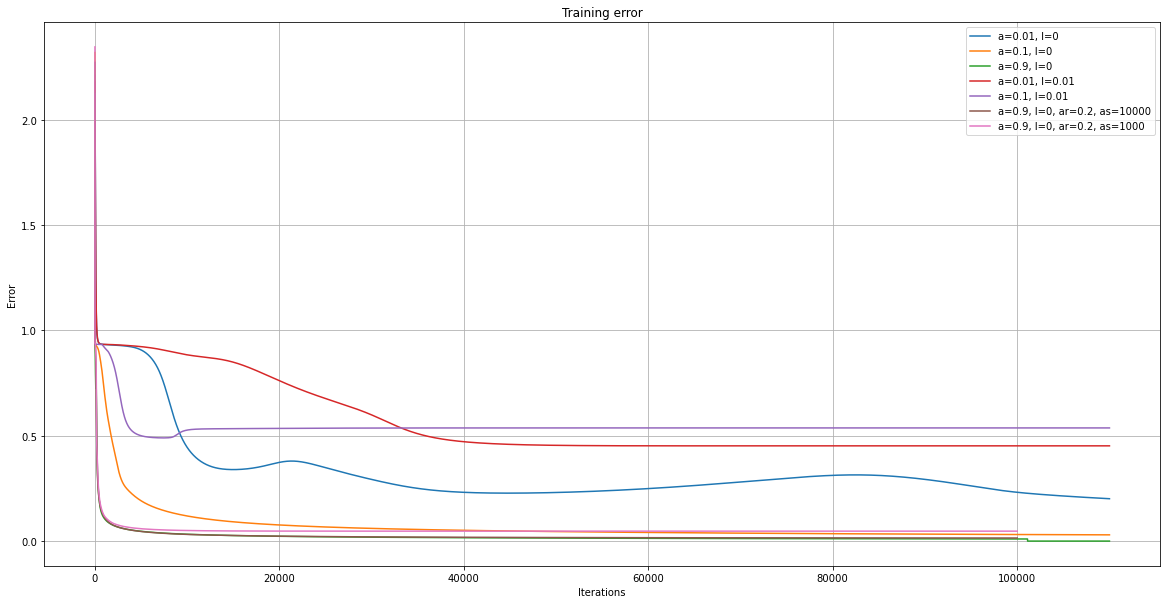

In [89]:
# graph iter - J
plt.figure(figsize=(20,10))
selected1 = [
    (0.01, 0),
    (0.1, 0),
    (0.9, 0),
    (0.01, 0.01),
    (0.1, 0.01)
]
selected2 = [
    (0.9, 0.2, 10000),
    (0.9,0.2, 1000)
]
# Select the best model
for k in selected:
    _, j, _ = models[k]
    a, l = k
    plt.plot((range(len(j[:110000]))), j[:110000], label=f"a={a}, l={l}")

for k in selected2:
    _, j, _ = changing_models[k]
    a, ar, as_ = k
    plt.plot((range(len(j[:110000]))), j[:110000], label=f"a={a}, l={fixed_l}, ar={ar}, as={as_}")

    
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Training error")
plt.grid()

plt.legend()
plt.show()

As we can see, the light green model is the optimal, and as we observed previously this is because we have $\lambda$ = 0.

The pink one is interesting as it starts with a bigger learning rate and after 1000 iterations it is reducing. We notice that when the learning rate is extremely low, then the error is slightly increasing. It makes sense, as it may stuck in a local optimal point and $\alpha$ is not big enough to improve the error.
On the contrary, the brown line with $\alpha$ = 0.9, $\lambda$ = 0, ar = 0.2 and as = 10000 has a different performance than the model in the pink line. Although, the pink and the brown lines start with the same learning rate, the brown behaves better because the learning rate is reducing after more steps and this does not result to a drastic reduction of $\alpha$.

In the blue line and the purple line we can see that the error is not monotonically decreasing and it seems that they get stuck in a local optimal point. After a while they adjust to some new optimal point. However, the purple line after the first local optimal point does not find any other better optimal point, probably because of overshooting. 

Regarding the red line, we can see that the regularization prevented the model to obtain a really small error and to "overfit", although we have a very small learning rate.

In [141]:
best_model = models[(0.9, 0)][0]

In [149]:
xs = data.get_data()
for i in range(xs.shape[1]):
    x = xs[:, i]
    y = best_model.predict(x)
    print("Expected:", list(x.astype(int)))
    print("Predicted:", [f"{i:.4f}" for i in list(y.T[0,:])])
    print("Rounded prediction:", list(y.round().T[0,:].astype(int)))
    print("---")

Expected: [1, 0, 0, 0, 0, 0, 0, 0]
Predicted: ['0.9947', '0.0018', '0.0051', '0.0000', '0.0000', '0.0000', '0.0057', '0.0028']
Rounded prediction: [1, 0, 0, 0, 0, 0, 0, 0]
---
Expected: [0, 1, 0, 0, 0, 0, 0, 0]
Predicted: ['0.0005', '0.9906', '0.0012', '0.0000', '0.0041', '0.0000', '0.0000', '0.0000']
Rounded prediction: [0, 1, 0, 0, 0, 0, 0, 0]
---
Expected: [0, 0, 1, 0, 0, 0, 0, 0]
Predicted: ['0.0032', '0.0075', '0.9918', '0.0057', '0.0000', '0.0000', '0.0000', '0.0030']
Rounded prediction: [0, 0, 1, 0, 0, 0, 0, 0]
---
Expected: [0, 0, 0, 1, 0, 0, 0, 0]
Predicted: ['0.0000', '0.0000', '0.0070', '0.9917', '0.0068', '0.0000', '0.0000', '0.0007']
Rounded prediction: [0, 0, 0, 1, 0, 0, 0, 0]
---
Expected: [0, 0, 0, 0, 1, 0, 0, 0]
Predicted: ['0.0000', '0.0050', '0.0000', '0.0053', '0.9907', '0.0025', '0.0000', '0.0000']
Rounded prediction: [0, 0, 0, 0, 1, 0, 0, 0]
---
Expected: [0, 0, 0, 0, 0, 1, 0, 0]
Predicted: ['0.0000', '0.0000', '0.0000', '0.0005', '0.0057', '0.9933', '0.0052', '0.

We chose the optimal model and we tested this model on all the training examples. The values in the predicted vector are very close to 0 or 1 respectively to the input values. By simply rounding the output vector, we were able to obtain 100% accuracy.

## Experiment 2

Interpret the values for the hidden layer and the weights

In [112]:
w1 = best_model._w1.copy()
w2 = best_model._w2.copy()

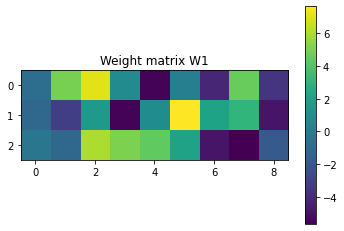

In [155]:
plt.title("Weight matrix W1")
plt.imshow(w1)
plt.colorbar()
plt.show()

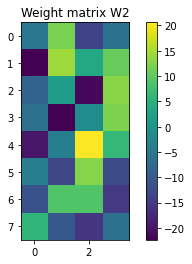

In [157]:
plt.title("Weight matrix W2")
plt.imshow(w2)
plt.colorbar()
plt.show()

We have noticed from the graphical representations of the weights of the model, that the highest values in the matrix might have common patterns. We can see a curve in the first figure, like a parabola, where the light green colours are represented. In the second figure we can see the same pattern but transposed. This might make sense, as we used the first matrix to encode the input and the second the decode the hidden layers to the output, and the input is the same as the output.

In [122]:
xs = data.get_data()

In [146]:
for n, i in enumerate(range(xs.shape[1])):
    best_model.predict(xs[:,i])
    print(n+1, list(best_model._h.round().T[0,1:]))
    print(n+1, list(best_model._h.T[0,1:]))

1 [1.0, 0.0, 0.0]
1 [0.9836240114729725, 0.013209908169167898, 0.1716246755928777]
2 [1.0, 1.0, 1.0]
2 [0.9979999329960617, 0.5818441344217546, 0.9963101229968708]
3 [0.0, 0.0, 1.0]
3 [0.4806721055253697, 0.001289605529133261, 0.9899607663209458]
4 [0.0, 0.0, 1.0]
4 [0.001721529004453039, 0.4195912663099088, 0.9813713325577106]
5 [0.0, 1.0, 1.0]
5 [0.3292673220870951, 0.9984812301136392, 0.8265369457438122]
6 [0.0, 1.0, 0.0]
6 [0.0062787322741341585, 0.70986456313496, 0.004792118776700137]
7 [1.0, 1.0, 0.0]
7 [0.9770121530145034, 0.8767037804141377, 0.002286945121007125]
8 [0.0, 0.0, 0.0]
8 [0.011961604359227515, 0.0023799204165014026, 0.08989214381256783]


From the values above we can see that if we round the hidden layer then we get one pair of duplicates. This might suggest that the hidden layer does not correspond to binary representation of the input. (e.g [1, 0, 0, 0, 0, 0, 0, 0] could be represented by [1, 0, 1, 0]).

## Experiment 3

See what happens with more than one 1

In [171]:
x1 = np.array([0, 0, 0, 1, 0, 1, 0, 0]).reshape(-1, 1)
x2 = np.zeros((8,1))
x3 = np.ones((8,1))
x4 = np.array([1, 1, 1, 1, 0, 0, 0, 0]).reshape(-1, 1)

In [172]:
y1 = best_model.predict(x1)
y2 = best_model.predict(x2)
y3 = best_model.predict(x3)
y4 = best_model.predict(x4)

In [173]:
for x,y in zip([x1, x2, x3, x4], [y1,y2,y3, y4]):
    print("Expected:", list(x.T.astype(int)))
    print("Predicted:", [f"{i:.4f}" for i in list(y.T[0,:])])
    print("Rounded prediction:", list(y.round().T[0,:].astype(int)))
    print("---")

Expected: [array([0, 0, 0, 1, 0, 1, 0, 0])]
Predicted: ['0.0000', '0.0000', '0.0000', '0.0134', '0.3664', '0.9666', '0.0003', '0.0001']
Rounded prediction: [0, 0, 0, 0, 0, 1, 0, 0]
---
Expected: [array([0, 0, 0, 0, 0, 0, 0, 0])]
Predicted: ['0.0006', '0.0000', '0.0003', '0.0002', '0.0000', '0.0001', '0.0000', '0.0230']
Rounded prediction: [0, 0, 0, 0, 0, 0, 0, 0]
---
Expected: [array([1, 1, 1, 1, 1, 1, 1, 1])]
Predicted: ['0.0003', '0.9802', '0.0005', '0.0000', '0.0064', '0.0000', '0.0000', '0.0000']
Rounded prediction: [0, 1, 0, 0, 0, 0, 0, 0]
---
Expected: [array([1, 1, 1, 1, 0, 0, 0, 0])]
Predicted: ['0.6008', '0.9342', '0.9967', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000']
Rounded prediction: [1, 1, 1, 0, 0, 0, 0, 0]
---


Here we are testing the model for inputs that have more than one 1 or only zeros. In the first and third example the model is trying to remove the additional 1. For the second example the predicted values are not exactly the same as the expected values and this is caused by the bias terms. The last example we notice that the predicted output removes one 1, but at the end we still have more than one 1.